# 상관 분석 
 - 산점도를 기준으로 한다. 
  1. 경향성.
  2. 선형, 비선형 인지?
  3. 이상치(Outlier) 발견.
 - 공분산 
  - cov(x,y) : xi와 yi 값의 부호가 의미를 가진다. => 기울기의 방향 음, 양
  - 두개의 변수 간의 분산의 관계.
  - 두개의 단위를 맞춰줘야한다. 
 - 상관계수 : 공분산 / 각 표준편차의 곱.  cov(x.y) / sd(x) * sd(y)
  - 절대값의 크기가 상관관계의 강도를 표현한다. 

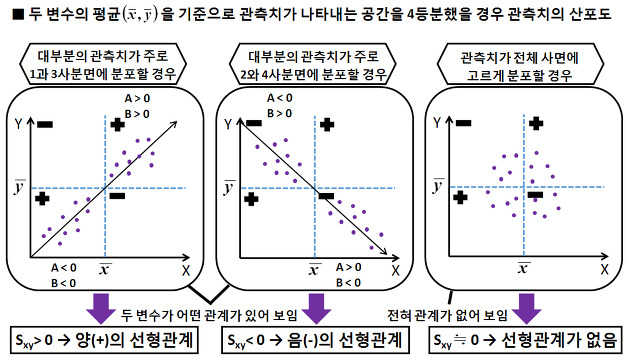

In [22]:
library("IRdisplay")
display_png(file="kmu/1.jpg")  

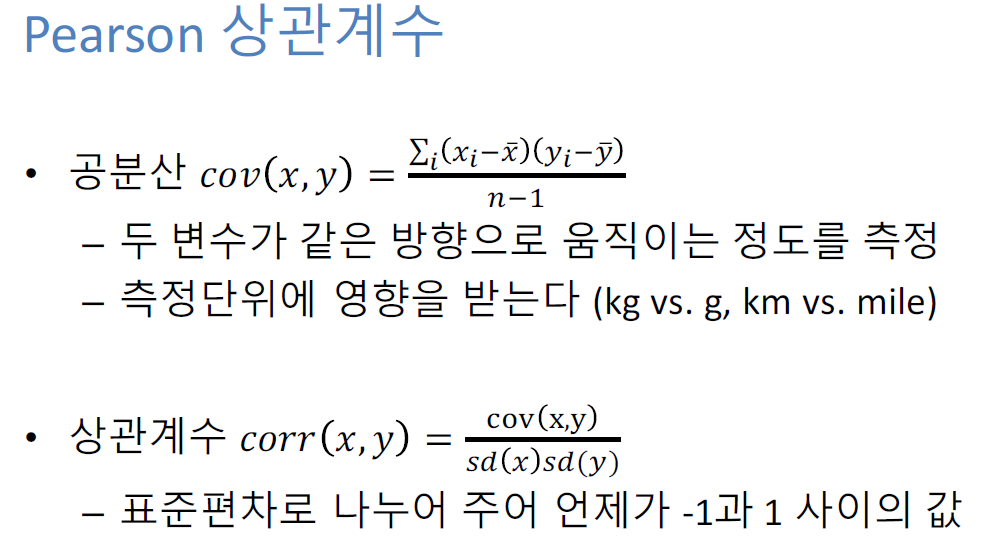

In [10]:
display_png(file="kmu/2.png", width = 500)  

## 공분산
- 분산식에서 볼 수 있는 잔차²/ n-1 에서 각각의 잔차를 곱한 모습이다. 
- ∑ ( xi - x bar )( yi - y bar ) / n-1
- 공분산이 가지는 의미 
 - 잔차의 곱의 위치에 따라 정의 관계인지, 음의 관계인지 알려준다.( 기울기 ) 

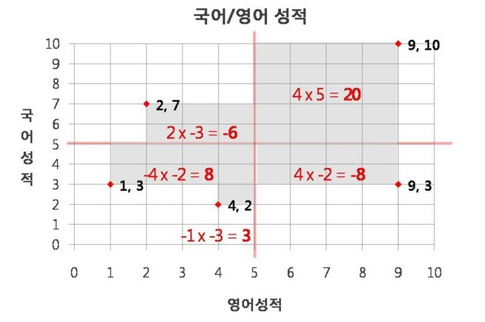

In [2]:
display_png(file="kmu/ch4/1.png")  

## Pearson 상관계수
 - 가장 많이 사용하는 상관계수
 - 직선관계의 정도를 나타낸다.
 - -1 ~ 1 ( 기울기 ) 값을 가진다. 
  - 양 : 같은 방향으로 움직인다. 
  - 음 : 반대 방향으로 움직인다.
 - 절대값 1에 가까을 수록 강한 상관관계
 - 0 에 가까울 수록 관계 없음.

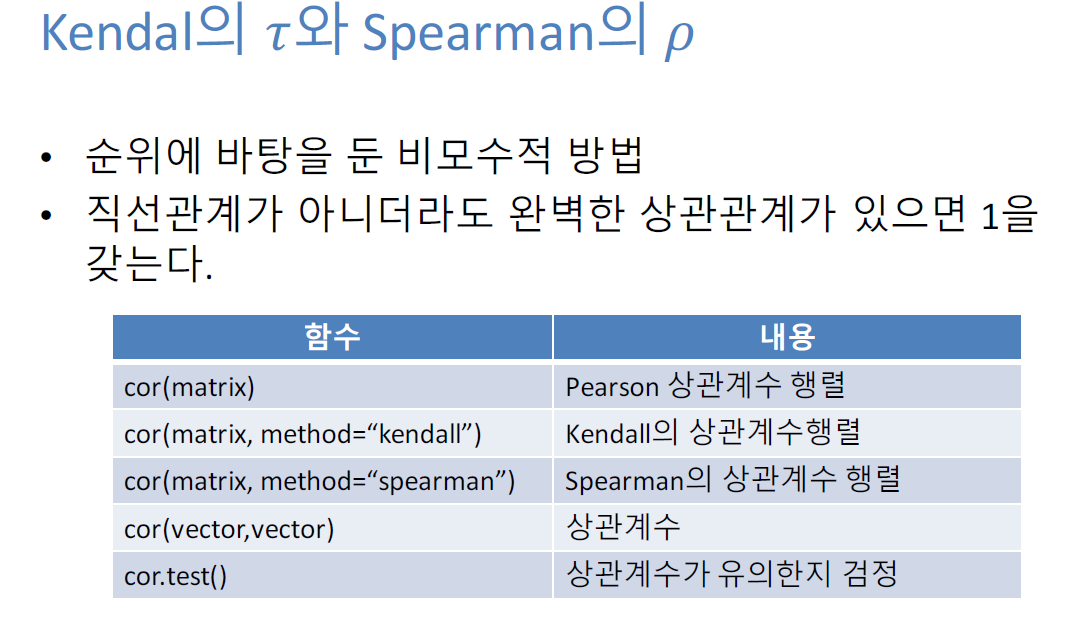

In [11]:
display_png(file="kmu/3.png", width = 500)

## Kendal, Spearman은 순위가 기준!
 - 선형관계가 아닐 때 사용한다. 
 - 각 상관계수의 종류 비교 
 - x 설명, 독립 변수 y : 종속변수 

[1] 100.8333

[1] 0.9745586

[1] 1

[1] 1

[1] 0

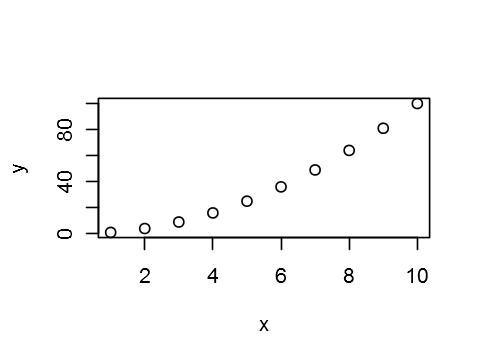

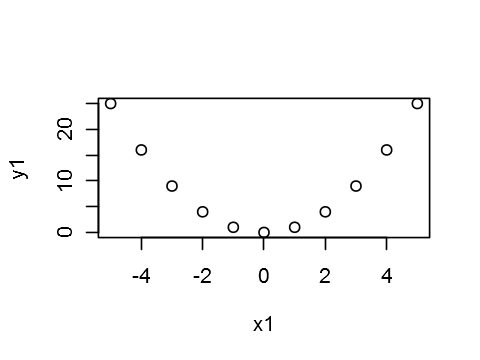

In [9]:
options(repr.plot.width=4, repr.plot.height=3)
x <- 1:10
y <- x ^ 2
cov(x,y) # 공분산. 
cor(x,y) # 상관계수
cor(x,y,method="kendall")
cor(x,y,method="spearman")
plot(x,y) # 그래프 
x1 <- -5:5
y1 <- x1 ^ 2 
cor(x1,y1,method="spearman") 
plot(x1,y1)

 # 예제 ( 직원 설문 조사 )
  - 어느금융회사에서 30개 부서에서 부서당 약 35명의 직원으로부터의 설문결과를 부서별로요약하였다. <br> 데이터의 숫자는해당 질문에 대해 긍정적으로 대답한 직원의 비율이다.

In [2]:
install.packages("reshape",repos = "http://cran.us.r-project.org")

package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpaKWvE9\downloaded_packages


In [3]:
library(reshape)

## 설명  
    Y	    rating	 numeric	 Overall rating
    X[1]	 complaints	numeric	 Handling of employee complaints
    X[2]	 privileges	numeric	 Does not allow special privileges
    X[3]	 learning	 numeric	 Opportunity to learn
    X[4]     raises	   numeric	 Raises based on performance
    X[5]	 critical	 numeric	 Too critical
    X[6]	 advancel	 numeric	 Advancement

In [4]:
head(attitude,3)
str(attitude)

rating complaints privileges learning raises critical advance
1     43         51         30       39     61       92      45
2     63         64         51       54     63       73      47
3     71         70         68       69     76       86      48

'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


In [20]:
summary(attitude)   #각 변수의 정보를 Summary 

     rating        complaints     privileges       learning         raises     
 Min.   :40.00   Min.   :37.0   Min.   :30.00   Min.   :34.00   Min.   :43.00  
 1st Qu.:58.75   1st Qu.:58.5   1st Qu.:45.00   1st Qu.:47.00   1st Qu.:58.25  
 Median :65.50   Median :65.0   Median :51.50   Median :56.50   Median :63.50  
 Mean   :64.63   Mean   :66.6   Mean   :53.13   Mean   :56.37   Mean   :64.63  
 3rd Qu.:71.75   3rd Qu.:77.0   3rd Qu.:62.50   3rd Qu.:66.75   3rd Qu.:71.00  
 Max.   :85.00   Max.   :90.0   Max.   :83.00   Max.   :75.00   Max.   :88.00  
    critical        advance     
 Min.   :49.00   Min.   :25.00  
 1st Qu.:69.25   1st Qu.:35.00  
 Median :77.50   Median :41.00  
 Mean   :74.77   Mean   :42.93  
 3rd Qu.:80.00   3rd Qu.:47.75  
 Max.   :92.00   Max.   :72.00  

In [22]:
# cor(attitude)   #전체 변수의 상관관계를 먼저 전체로 봄
round(cor(attitude),3)

rating complaints privileges learning raises critical advance
rating      1.000      0.825      0.426    0.624  0.590    0.156   0.155
complaints  0.825      1.000      0.558    0.597  0.669    0.188   0.225
privileges  0.426      0.558      1.000    0.493  0.445    0.147   0.343
learning    0.624      0.597      0.493    1.000  0.640    0.116   0.532
raises      0.590      0.669      0.445    0.640  1.000    0.377   0.574
critical    0.156      0.188      0.147    0.116  0.377    1.000   0.283
advance     0.155      0.225      0.343    0.532  0.574    0.283   1.000

 - 변수별 산점도.

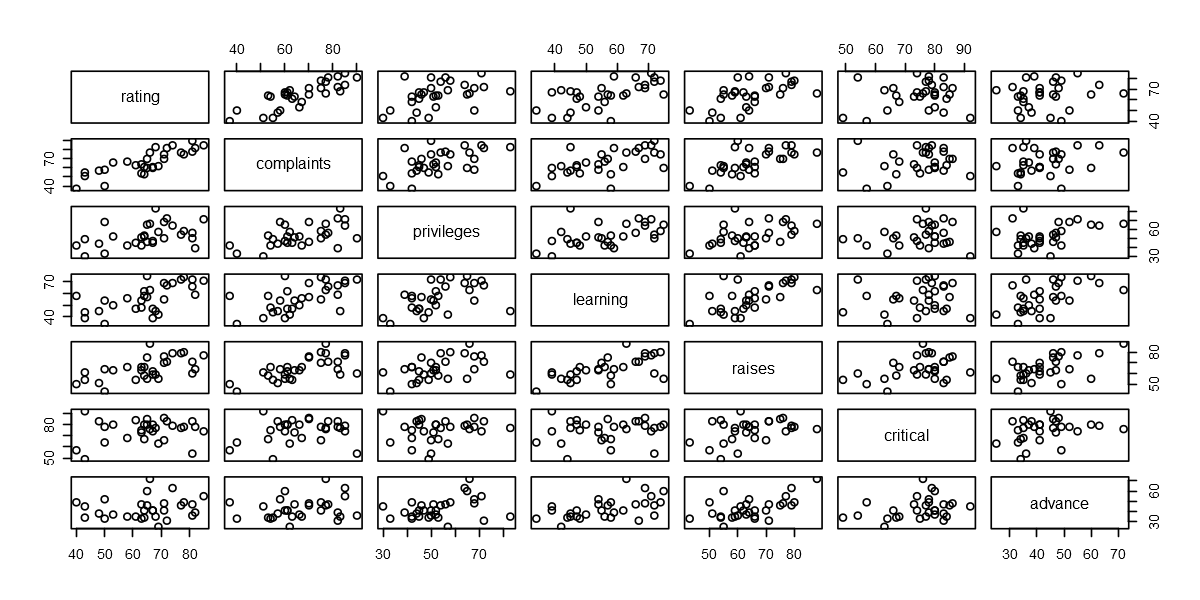

In [26]:
options(repr.plot.width=10, repr.plot.height=5)
pairs(attitude)   #변수별 산점도

## 좀더 가시성 있는 그래프를 보기 위해 설치 
 - psych 

In [5]:
install.packages("psych" ,repos = "http://cran.us.r-project.org")   #pairs를 보다 가시성 있게 보고 싶다면 install~

also installing the dependency 'mnormt'



package 'mnormt' successfully unpacked and MD5 sums checked
package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpaKWvE9\downloaded_packages


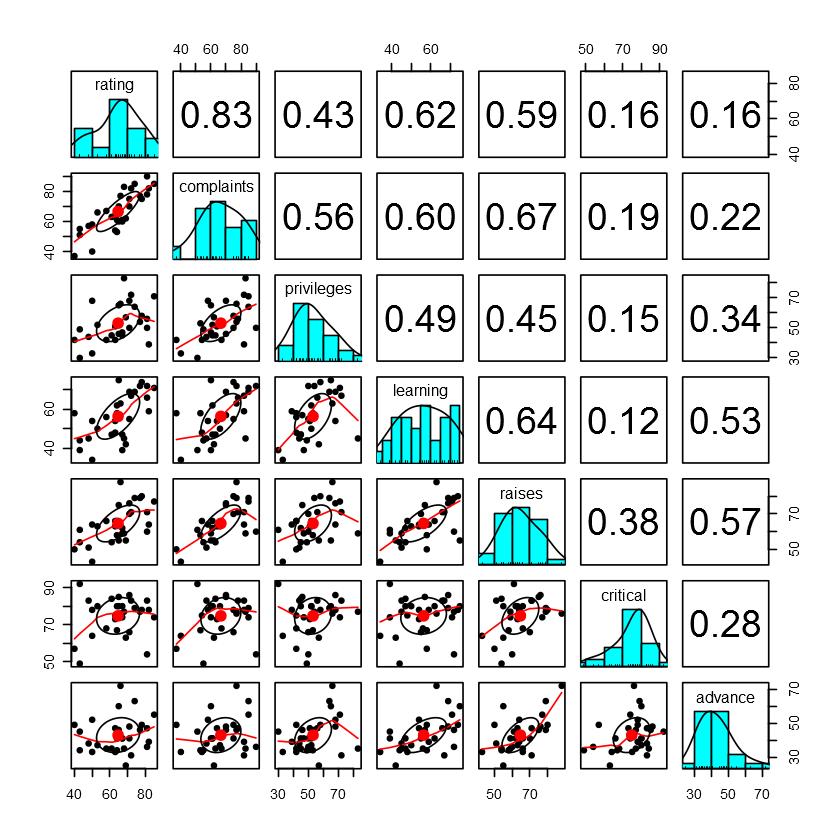

In [6]:
library(psych)
pairs.panels(attitude)   #산점도와 상관관계 등을 한꺼번에 볼 수 있다 

 ### 설명.
 - 하늘색 부분은 각 변수의 histogram 
 - 왼쪽 아래는 2개 변수의 산점도, 우측 위는 상관계수 

## Pearson 
 - 선형관계만 확인한다. ( 노트 필기 사진 입력 ) 
 - 아치형 그래프의 경우, 실제로는 관계가 크지만 선형관계수는 0에 가깝게 나온다.
  - 그래프 확인 필.

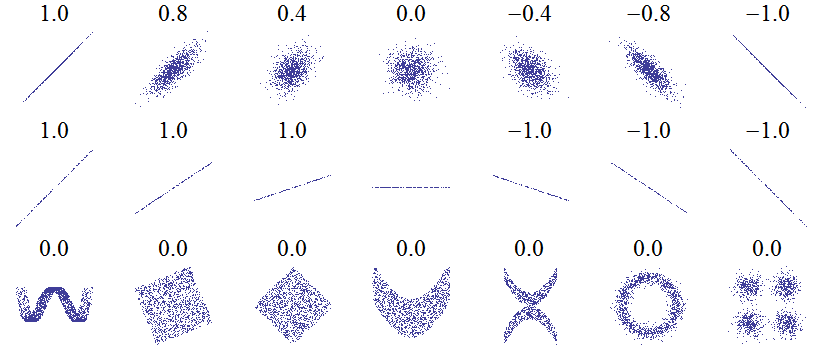

In [14]:
display_png(file="kmu/4.png")

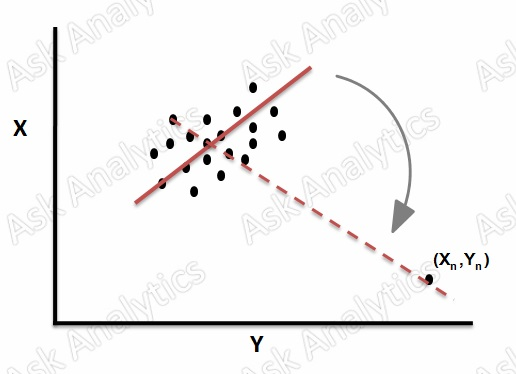

In [15]:
display_png(file="kmu/5.jpg", width = 500)

## 상관계수가 의미를 가지는 기준은? 뭐가 높은 거에요?
 - 사실 기준은 없다!
 - 0이냐 아니냐를 해보는 test는 있다 (조금이라도 관계가 있는지 없는지 비교)
 - Η0 : ρ = 0  &nbsp;&nbsp;&nbsp; Η1 : ρ != 0 

In [10]:
cor(attitude$rating,attitude$complaints)
cor.test(attitude$rating, attitude$complaints) 

[1] 0.8254176


	Pearson's product-moment correlation

data:  attitude$rating and attitude$complaints
t = 7.737, df = 28, p-value = 1.988e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6620128 0.9139139
sample estimates:
      cor 
0.8254176 


### 설명. 
 - 대립가설 : 로우(true correlation)이 0이 아니다, 상관관계가 조금이라도 있다!
 - P-value가 0.05보다 작다. Ho를 기각한다! e = 10 ^ -8 
 - 그러나 빅!데이터, 즉 데이터가 엄청 많은 경우, P-valeu가 많이 작을 수 있다.
 - 세부 그래프는 항상 함께 확인하는 것이 좋다.

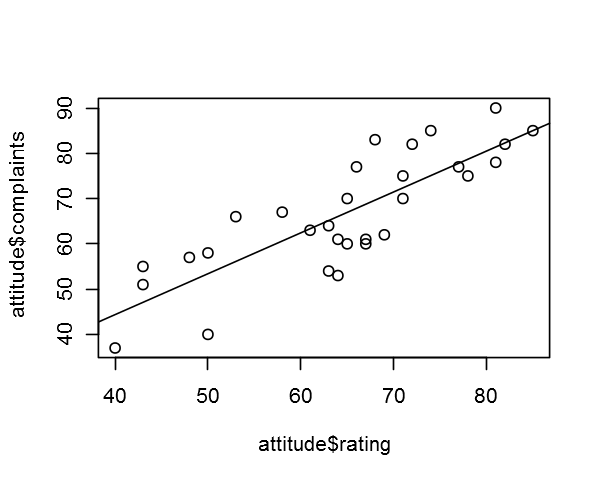

In [26]:
options(repr.plot.width=5, repr.plot.height=4)
plot(attitude$rating, attitude$complaints)
tmpout <- lm(attitude$complaints~attitude$rating)
abline(tmpout)

# 단순 회귀 분석 
 - 설명(독립)변수가 한 개 있는 경우를 단순회귀분석이라고 한다.
 - x가 원인이 되어 y가 어떻게 변하는 지에 대한 수식
 - 인과관계는 아니다! 조심하자! 이건 상관관계다! 
 - <font color="red">이론적인 선험적인 고려가 선행되어야 한다. (즉, 배경적인 지식을 가지고 행동을 해야 한다. ) </font>
 - 엡실론:(오차항 Residual) 선으로부터 점들이 얼마나 떨어져 있는지 수치화 
   - 다 더하면 0이다, 그래야 선이 의미를 가진다 
   - 선으로부터 많이 퍼져있는 경우 분산이 크다, 선에 많이 붙어있으면 분산이 작다
   - 분산이 작은 것이 correlation 즉 상관관계가 크다 
 - 추정된 회귀모형: 직선 그 자체의 식 
  - 기울기가 0이냐 아니냐가 의미를 가진다: 과연 x가 y를 설명할 수 있는 변수인가?
  - x에 상관없이 y 는 항상 베타0, 즉 상수다 <- x는 y에 있어서 의미를 가지지 않는다

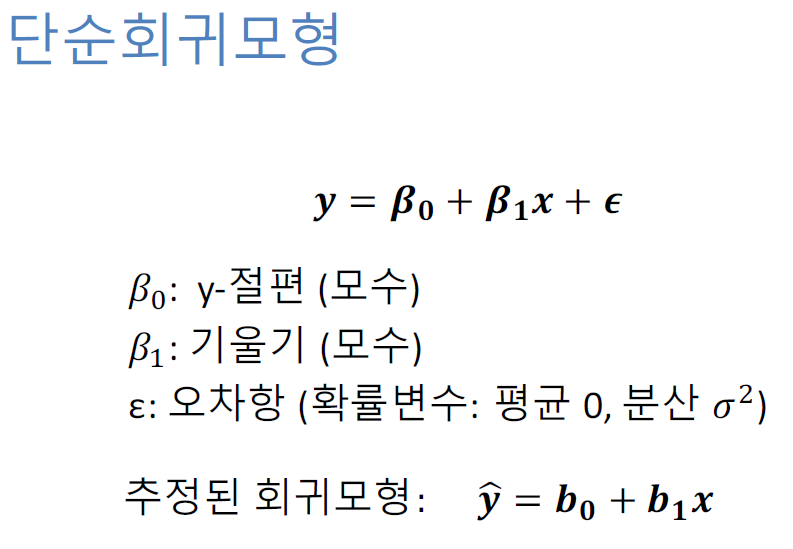

In [17]:
display_png(file="kmu/6.png", width = 500)

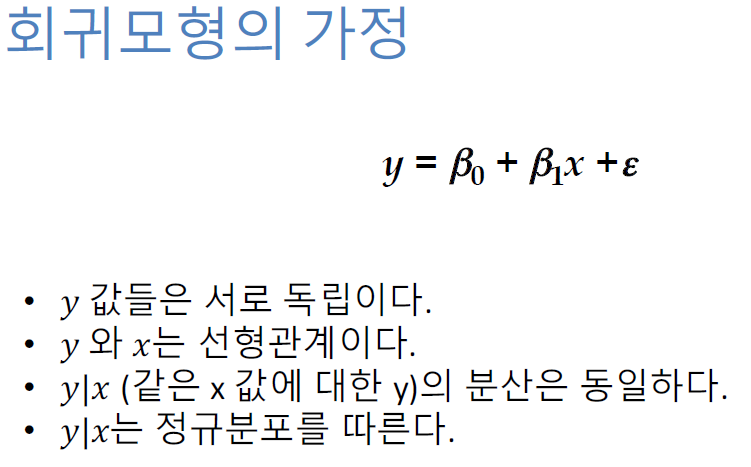

In [20]:
display_png(file="kmu/7.png", width = 500)

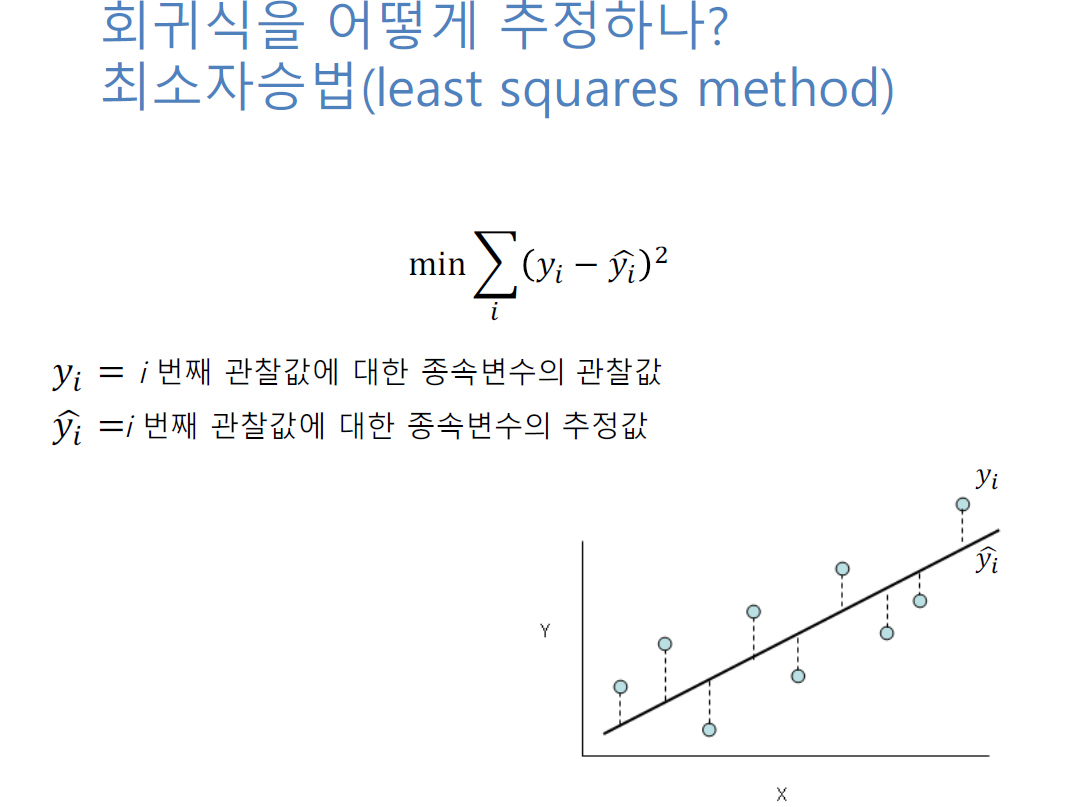

In [27]:
display_png(file="kmu/8.png", width = 500)

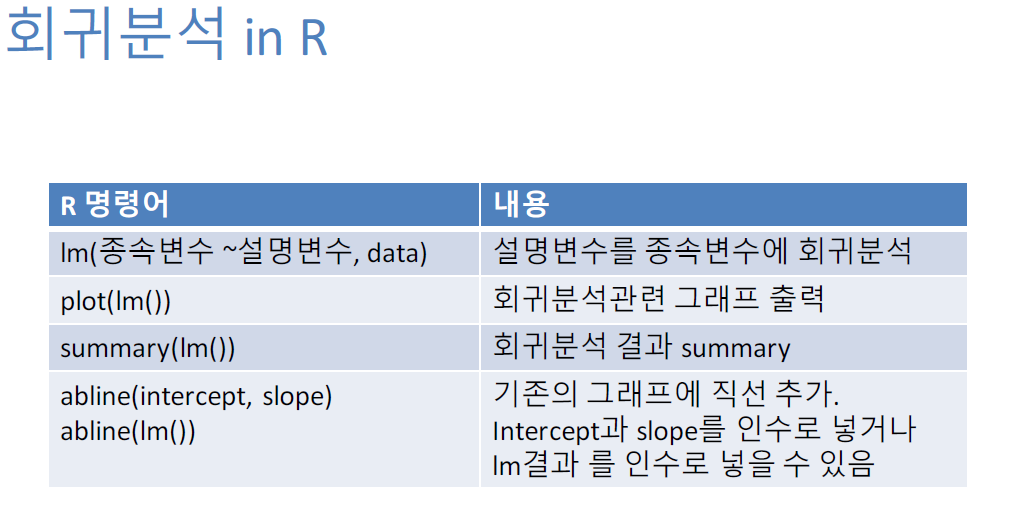

In [30]:
display_png(file="kmu/9.png", width = 600)

In [13]:
cars <- read.csv("SLData/cars.csv")
# R에도 존재한다 cars

In [12]:
str(cars)
summary(cars)   #2개의 변수 (brake밟았을 때에 속도에 따라 멈추는 데 걸리는 거리)

'data.frame':	50 obs. of  2 variables:
 $ speed: int  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : int  2 10 4 22 16 10 18 26 34 17 ...


     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

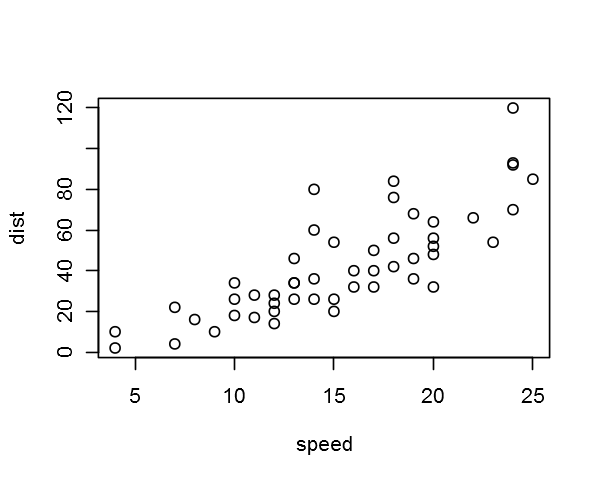

In [45]:
plot(cars)   #처음 보면 큰 문제가 없어 보인다? 답정너!

## lm (linear model) : 선형모델
 - 종속변수 ~ 독립변수 ( 설명변수 ) 

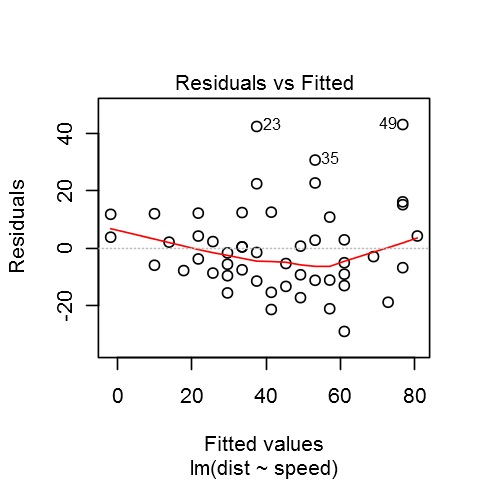

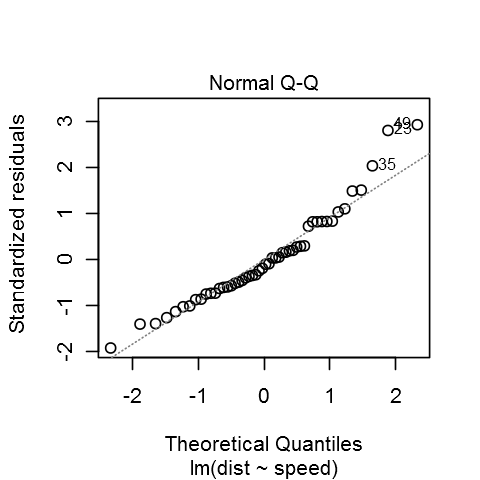

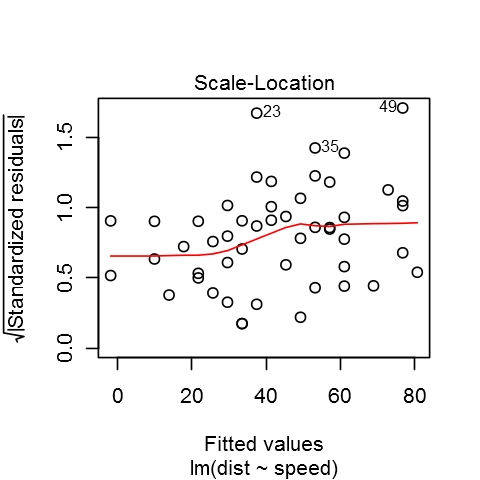

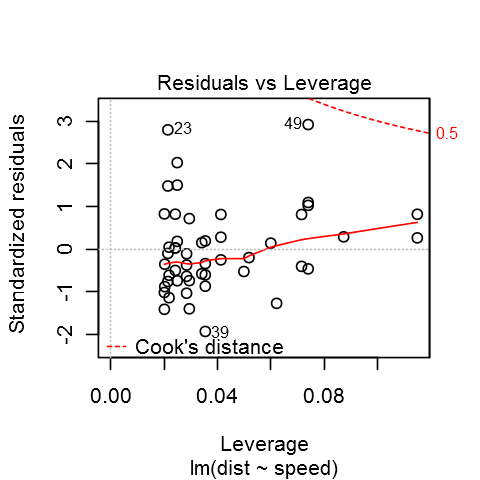

In [17]:
options(repr.plot.width = 4, repr.plot.height=4)
out <- lm(dist~speed, data=cars)   #lm = linear model (선형 모델) #종속변수~설명변수(독립변수)
plot(out)

In [34]:
print("-17.5791 + 3.9324x = y")
summary(out)  # std.Error : 추정치에 대한 변동성? 높을 수록 좋지 않다. 에러가 포함될 확률이 높다. #Estimate : 추정치.

[1] "-17.5791 + 3.9324x = y"



Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


## 설명 
 - Summary 에서 각 변수별 나오는 p-value의 값의 가설은? 
  - Ho : b1 = 0 vs H1: b1 != 0   기울기가 0인지 즉, 관계 유무 확인 
 - Estimate 추정치의 정확치 by 변동성
  - Estimate Speed : b1 => 기울기 
  - Estimate Intercept : b0 => Y 절편 
 - residual = 잔차 (y1원래데이터값 & y햇=선형식에서의값의 차이) => 엡실론
  - 앱실론 : 선으로부터 점이 떨어진 정도.
 - 잔차의 평균은 0이다 (그렇게 선형식을 만드니까!) 그래서 summary에 mean값이 없다 

 - b1 : 속력이 1만큼 증가했을 때 거리는 3.93 만큼 증가한다. 
 - b0 : 속력이 0일 때 거리는 -17.58이다. 

In [35]:
summary(out)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


## 설명 2
               Estimate Std. Error t value Pr(>|t|)   
    (Intercept) -17.5791     6.7584  -2.601   0.0123 *   
    speed         3.9324     0.4155   9.464 1.49e-12 *** 
    
    ※ p-value가 1.49e-12로 굉장히 작다. 
    ※ Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 부분을 보면 위에 *의 갯수에 따른 값의 위치를 알 수 있다.
    
    즉, 각각의 변수가 0이라는 결론을 알 수 있다. 
    
    ※ 만약 intercept 의 경우는 귀무가 기각이 되지 않더라도 그대로 두고, 독립변수가 기각이 되지 않고 0이 된다면 제거 . 즉, 관계X

In [20]:
summary(out)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


## 설명 3
 - F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12 
 - t.test 
  - H0 : b1 = 0 / H1 : b1 != 0 
  - H0 : b0 = 0 / H1 : b0 != 0 
  - 즉, 회귀모형이 유의한 것인지 아닌지. 
 - F-Test ( F검정통계량 ) 
  - 회귀식이 유효한지 아닌지 판정하는 것이다. 
   - 그렇다면 뭐에 대한 p-value인가? 
   - H0 : 회귀모형이 유의하지않다. H1: 회귀모형이 유의 하다. 즉, b1 = 0 인지 아닌지 ( 유의성 ) 
  - 회귀모형이 유효하다. 
  - 단순회귀에서는 t.test와 f.test 와 동일하다. 이유는 b1 = 0인지 아닌지와 동일하게 때문에. 
   - speed p.value와 f.test의 p.value가 동일하다.
  - 다중회귀에서는 b0 = b1 = b2 .... = 0  인지 아닌지 물어보기때문에 f.test != t.test 

## ANOVA TABLE 

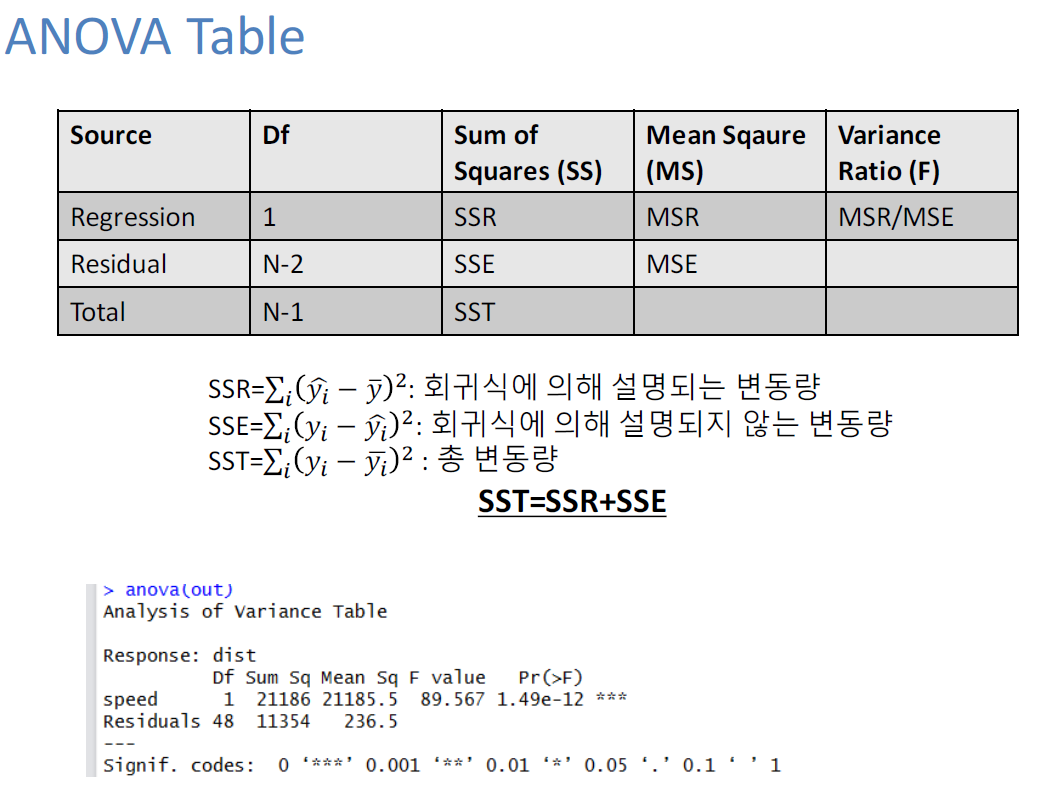

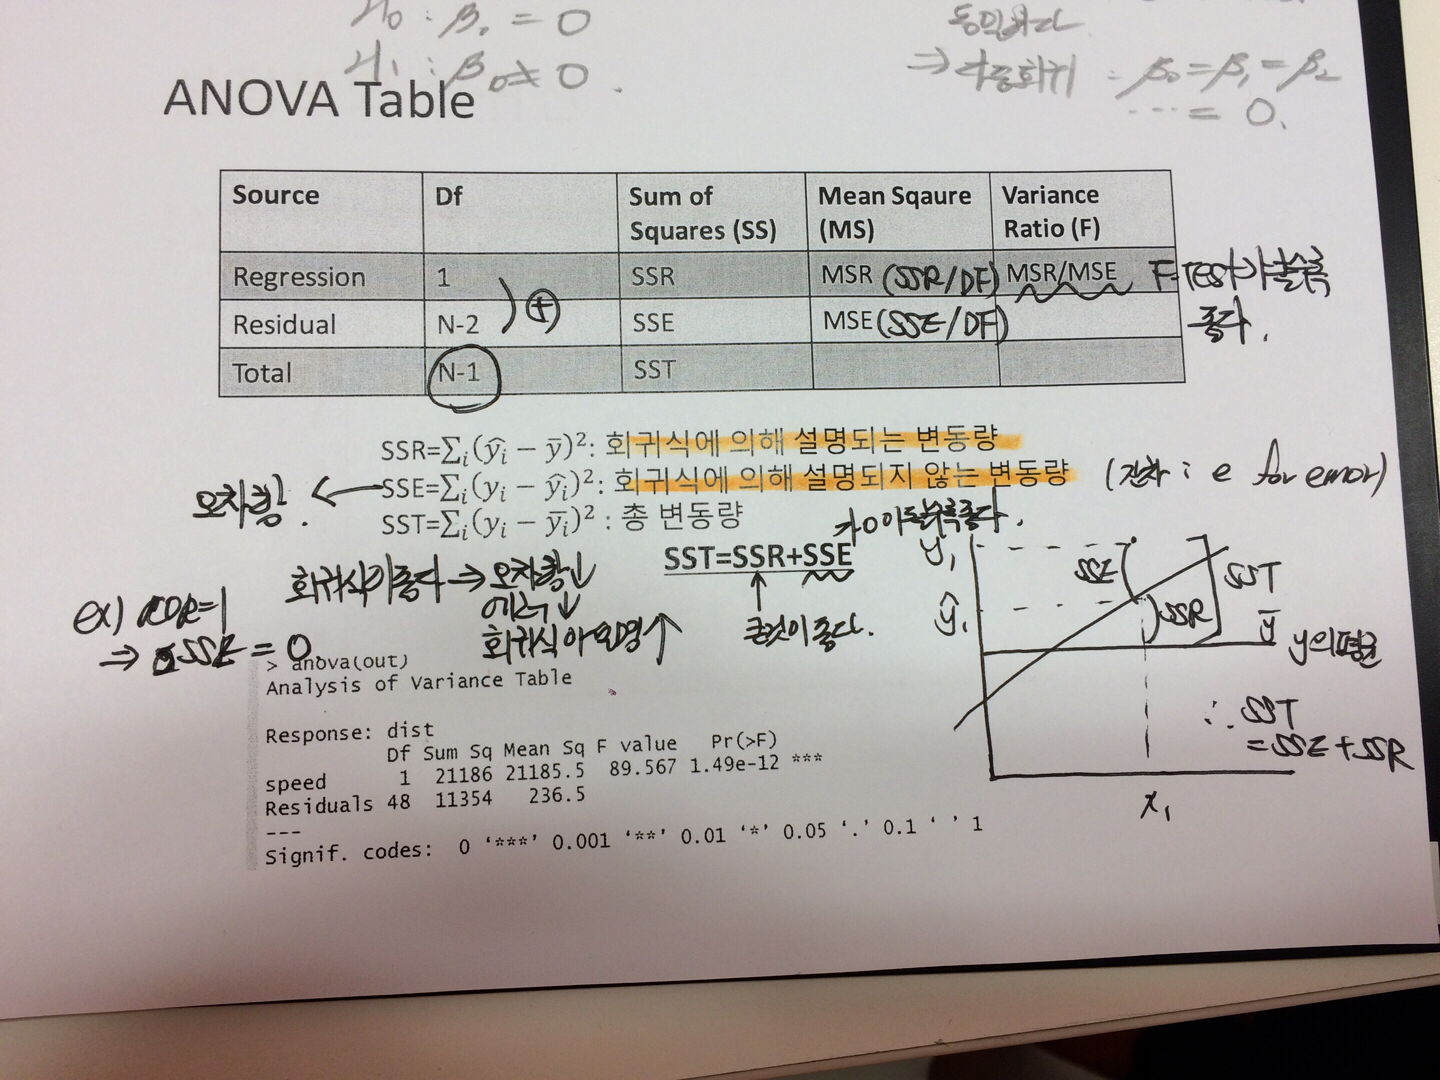

In [23]:
display_png(file="kmu/10.png", width = 600)
display_png(file="kmu/ch4/2.jpg", width = 600)

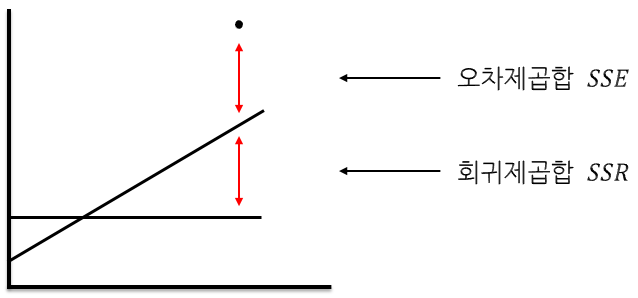

In [40]:
display_png(file="kmu/11.png", width = 600)

In [43]:
anova(out)

Analysis of Variance Table

Response: dist
          Df Sum Sq Mean Sq F value   Pr(>F)    
speed      1  21186 21185.5  89.567 1.49e-12 ***
Residuals 48  11354   236.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 결정계수 (R^2) 

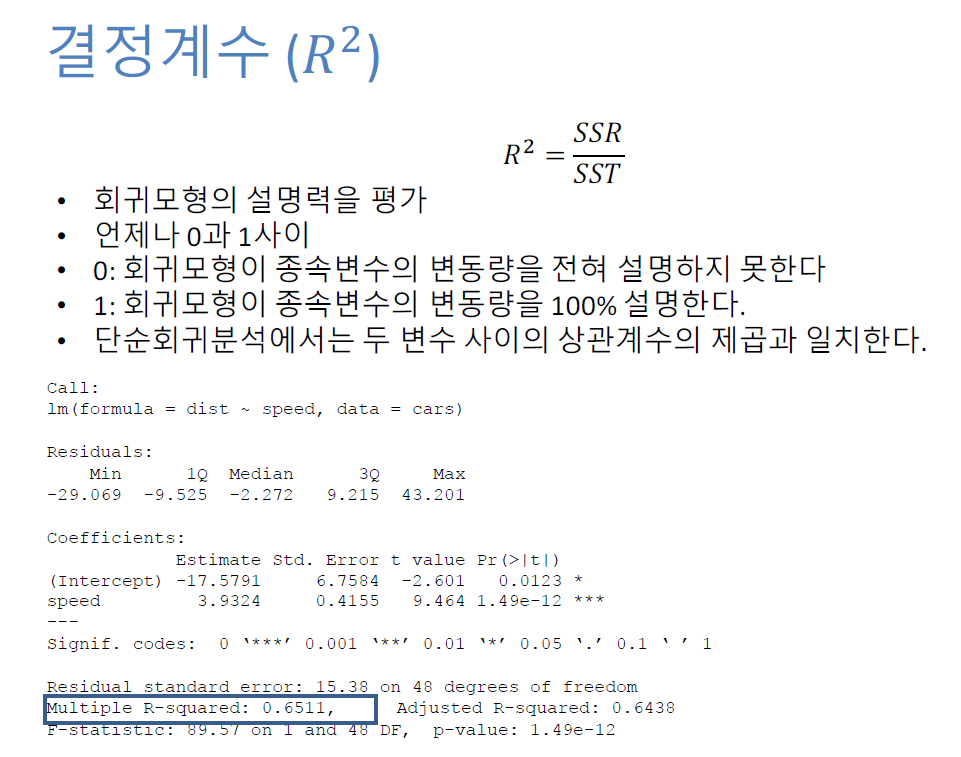

In [46]:
display_png(file="kmu/12.png", width = 700)

## 산점도와 회귀선

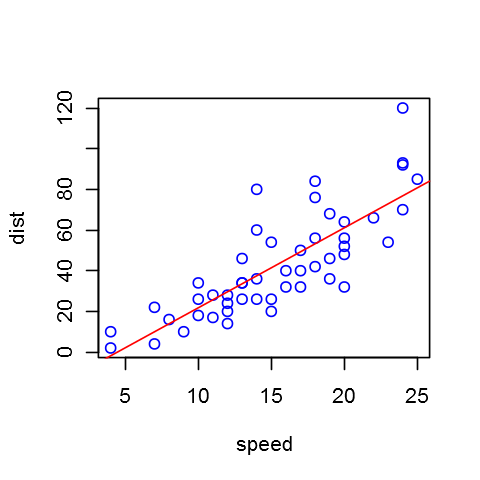

In [18]:
plot(dist~speed,data=cars,col="blue")
abline(out,col="red")

### No intercept model (y절편을 없앰)
 - break를 안 밟았을 때의 거리가 0인 것이 당연하다
 - <b><font size=3> 선형식 = y = 2.91x </font><b>

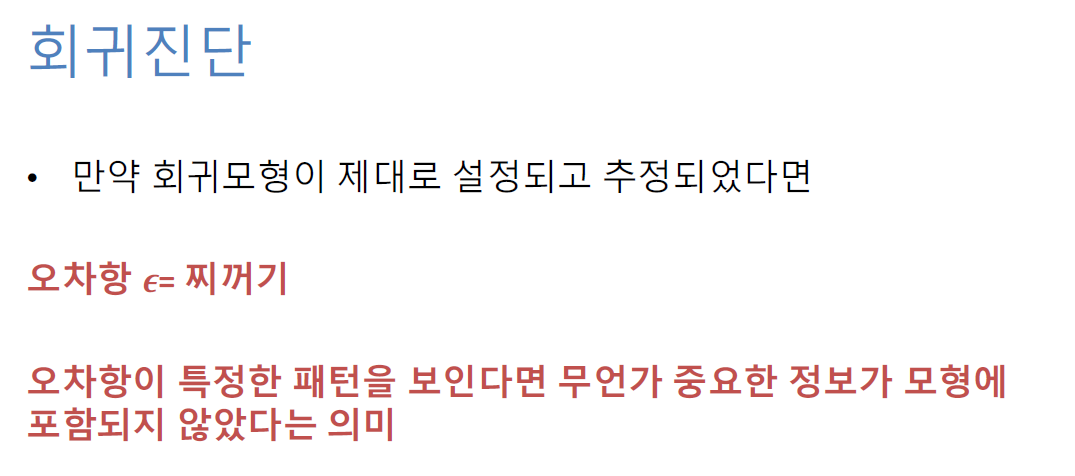

In [50]:
display_png(file="kmu/13.png", width = 700)

## 오차항에 대한 가정
 - 오차항 ε 은 평균이 0인 확률변수이다.
 - ε의 분산은 모든 x값에 대해 동일하다.
 - ε 값들은 서로 독립적이다.
 - 오차항 ε 은 정규분포를 이루는 확률 변수이다.

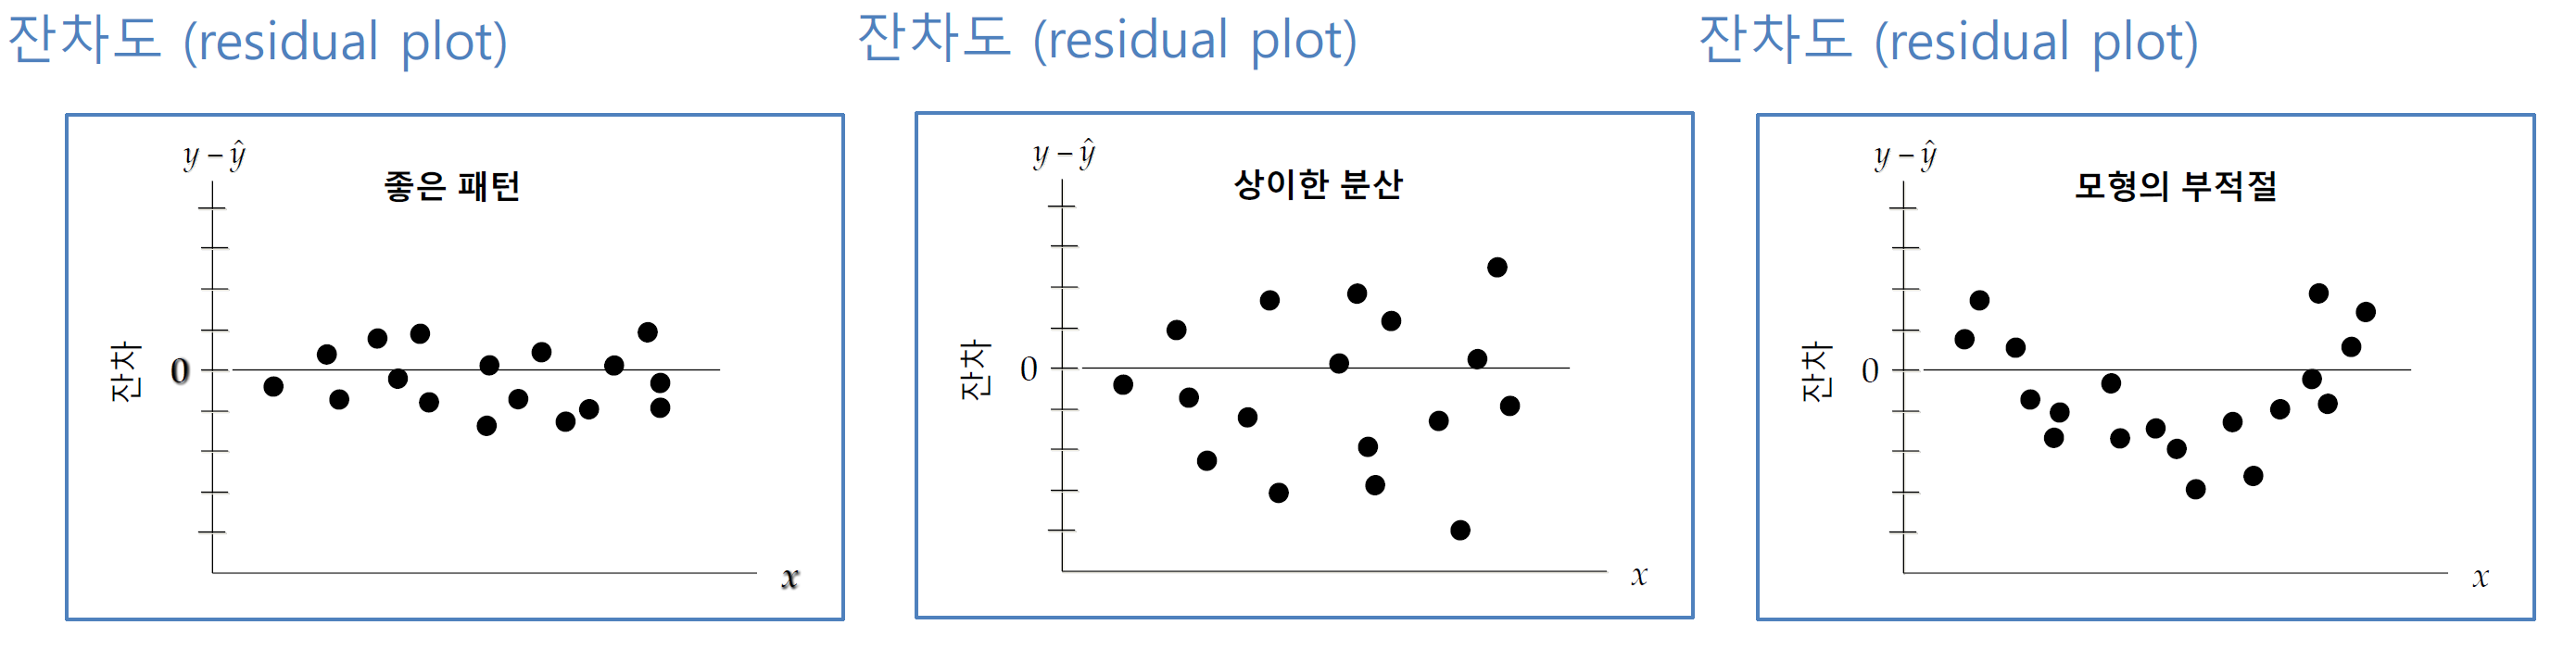

In [53]:
display_png(file="kmu/14.png")

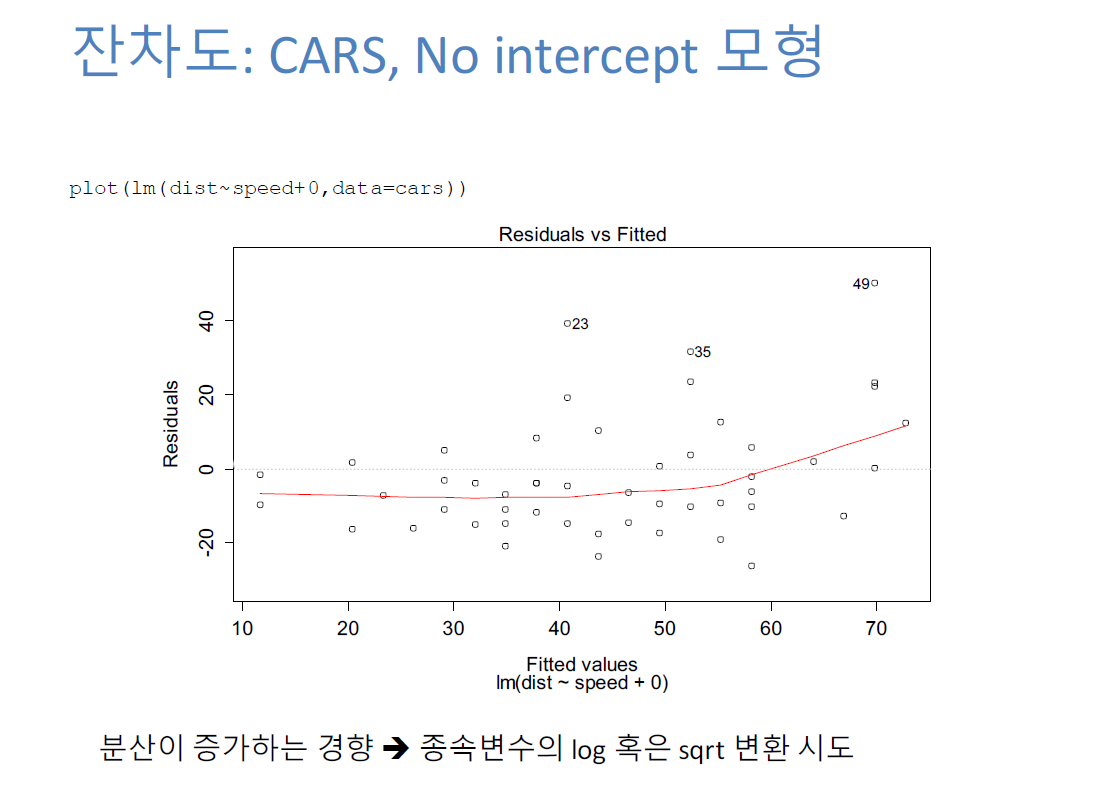

In [54]:
display_png(file="kmu/15.png", width = 700)

In [58]:
out1.5 <- lm(dist~0+speed, data=cars) # intercept 를 0으로 하겠다. 
summary(out1.5)


Call:
lm(formula = dist ~ 0 + speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.183 -12.637  -5.455   4.590  50.181 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
speed   2.9091     0.1414   20.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.26 on 49 degrees of freedom
Multiple R-squared:  0.8963,	Adjusted R-squared:  0.8942 
F-statistic: 423.5 on 1 and 49 DF,  p-value: < 2.2e-16


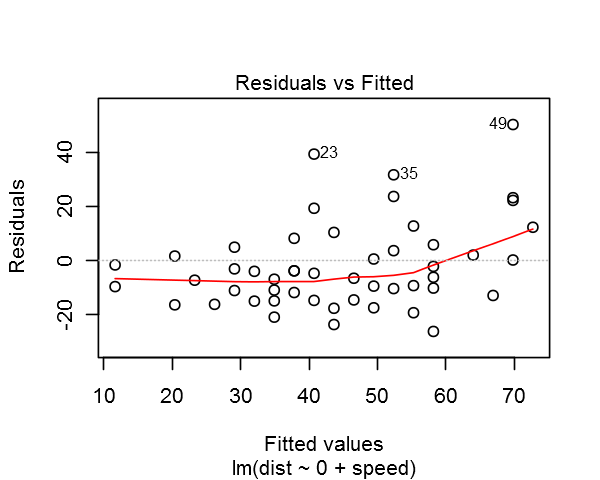

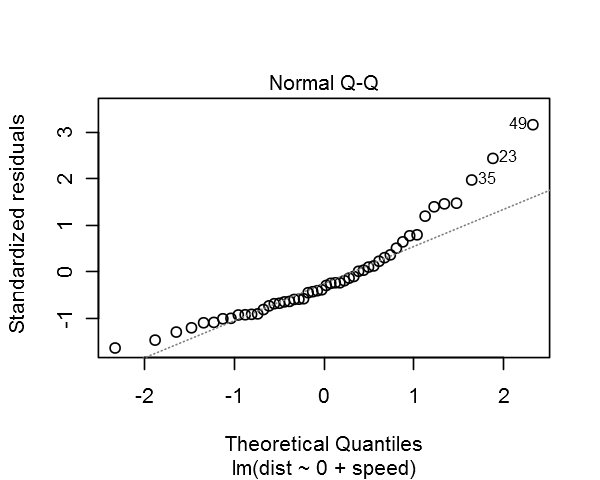

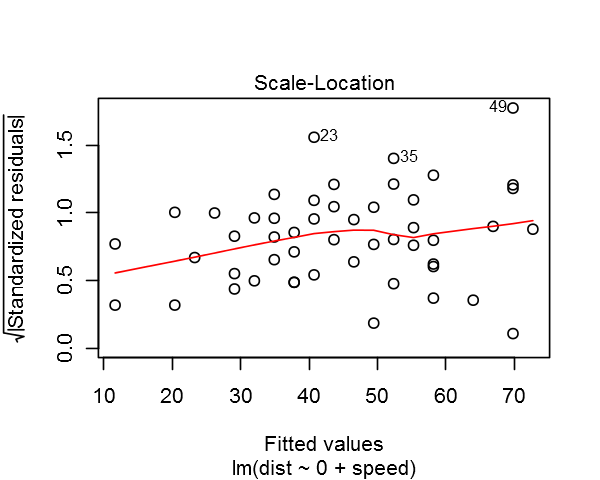

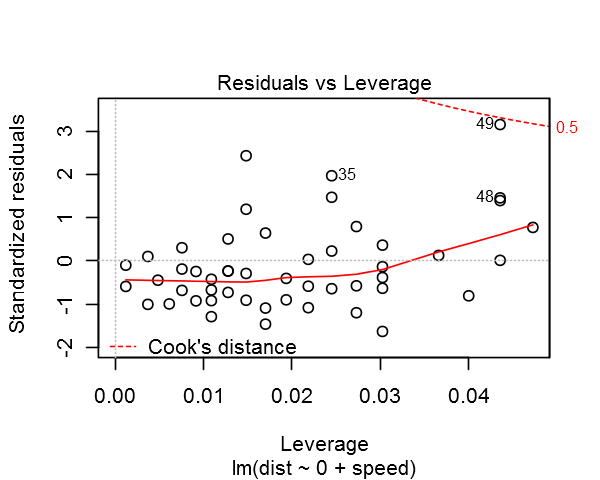

In [59]:
plot(out1.5)

### 설명
 - residual plot (별로다)
 - Normal Q-Q plot (정규분포 확인: X)
 - 2번째 잔차도 (띠 형태가 아니다: not good)

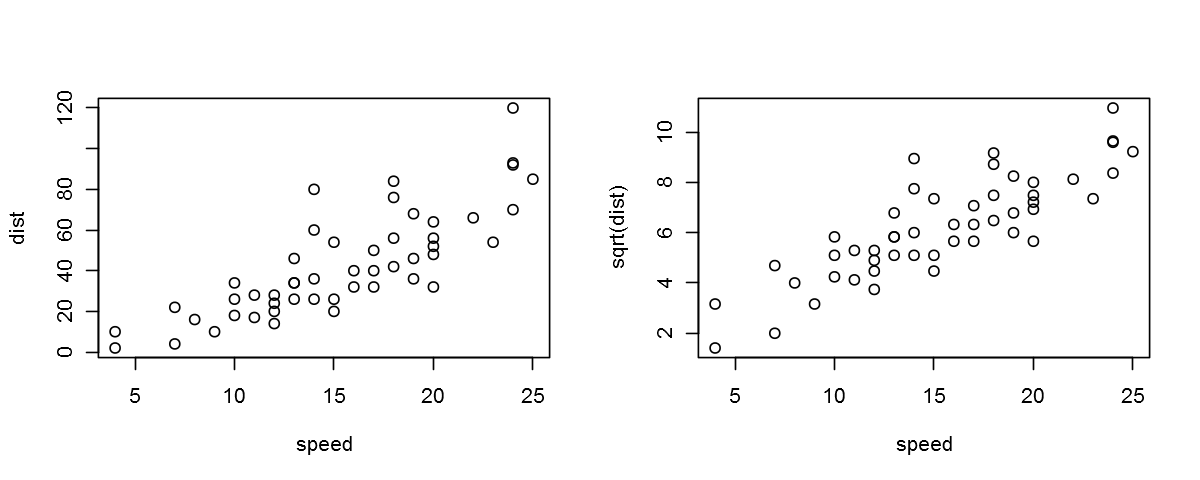

In [58]:
options(repr.plot.width=10, repr.plot.height=4)
par(mfrow=c(1,2))
plot(dist~speed, cars) #변환해 보니, 앞쪽 분산이 너무 크다!
plot(sqrt(dist)~speed, cars)  #분산도 꽤 일정하고, 비교적 보기 좋은 선형 모형이다

 - 보기 좋은 모형으로 바꾼 후에 그것을 종속변수로 넣고 회귀분석을 한다 
 ## 설명
 - sqrt를 함으로써 단위가 달라졌다 
 - 매우 유의하다 P-value가 매우 작다 
 - Multiple R-squared:  0.9689
 - 96.89% 설명력 <- 루트 변환 후에 회귀식의 설명력이 훨씬 올라갔다 
 - F-test의 P-value도 매우 작다 

In [3]:
options(repr.plot.width=5, repr.plot.height=4)
par(mfrow=c(1,1))
out2 <- lm(sqrt(dist)~0+speed, data=cars)
summary(out2)


Call:
lm(formula = sqrt(dist) ~ 0 + speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2781 -0.6972  0.0208  0.7965  3.3898 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
speed  0.39675    0.01015   39.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.167 on 49 degrees of freedom
Multiple R-squared:  0.9689,	Adjusted R-squared:  0.9683 
F-statistic:  1528 on 1 and 49 DF,  p-value: < 2.2e-16


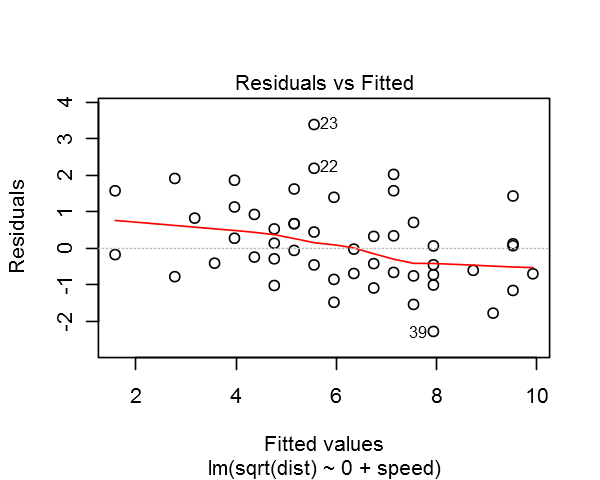

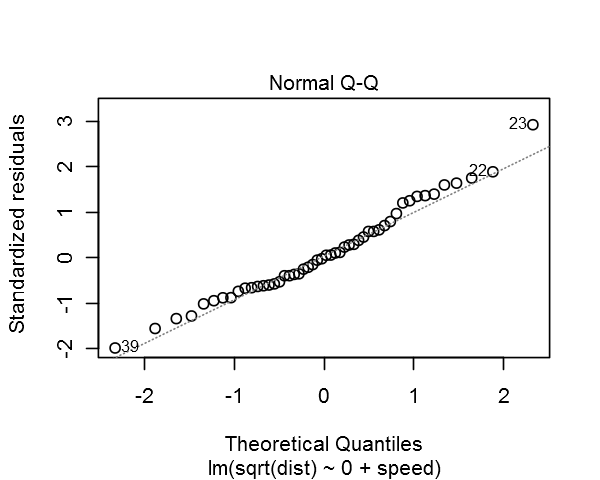

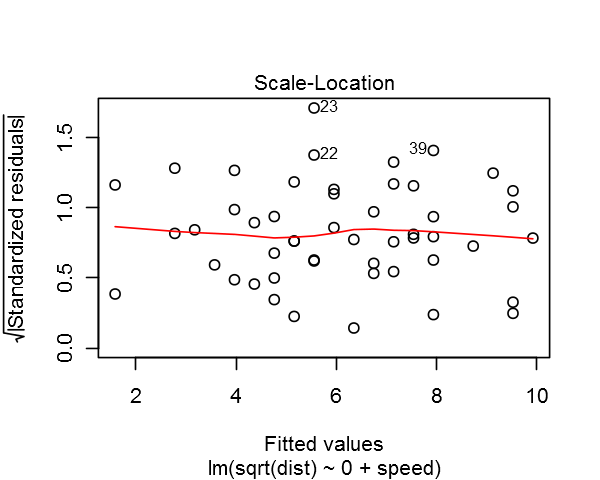

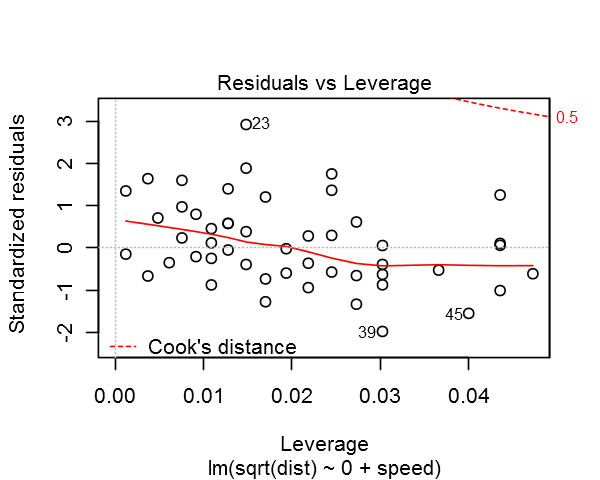

In [63]:
plot(out2)

## 추정과 예측
 - out2의 모델에서, 새로운 변수인 enw를 넣어서 예측한다
 - 루트(dist)이 0.397speed => 0.397*10 => 원래 scale로 돌아오려면  <font size=4 bold> ^ 2 </font>

In [1]:
new <- data.frame("speed"=c(10,30))
new

speed
1    10
2    30

In [4]:
predict(out2, new)  # out2의 모델에서, 새로운 변수인 enw를 넣어서 예측한다

1         2 
 3.967494 11.902483

In [70]:
# 원래 scale로 돌아오려면
predict(out2, new)^2

1         2 
 15.74101 141.66909

## 신뢰구간과 예측
 - lwr ~ upr
 - default가 95% 신뢰구간
 - 여러개 뽑아서 평균 : 평균적으로 이 구간 안에 들어갈 거라고 생각한다
 - random하게 차를 엄청 많이 like 백만대 뽑아서 평균 

In [5]:
predict(out2, new, interval="confidence")

fit       lwr      upr
1  3.967494  3.763518  4.17147
2 11.902483 11.290554 12.51441

 - 하나의 차에 대한 예측이므로 범위가 더 커진다 (덜 확실하지만 사례에 따라 달라진다)

In [74]:
predict(out2, new, interval="prediction")

fit      lwr       upr
1  3.967494 1.612650  6.322338
2 11.902483 9.477995 14.326970

### fitted ( Extract Model fitted value)
 - 모델링에서 예측한 결과를 뿌려준다. 
 - 각 speed 값에 대한 dist의 예측값
 - 각 y헷의 값 = fitted(x) 

In [55]:
head(fitted(out2),3)

ERROR: Error in fitted(out2): 객체 'out2'를 찾을 수 없습니다


- 50개에 대한 모든 y의 예측치 
- speed가 x, dist가 y, 산점도를 그린다
- fitted = y햇의 값 전부

In [6]:
head(cbind(cars,fitted(out2)),10)
head(cbind(cars,fitted(out2)^2),10)

speed dist fitted(out2)
1      4    2     1.586998
2      4   10     1.586998
3      7    4     2.777246
4      7   22     2.777246
5      8   16     3.173995
6      9   10     3.570745
7     10   18     3.967494
8     10   26     3.967494
9     10   34     3.967494
10    11   17     4.364244

speed dist fitted(out2)^2
1      4    2       2.518562
2      4   10       2.518562
3      7    4       7.713095
4      7   22       7.713095
5      8   16      10.074246
6      9   10      12.750218
7     10   18      15.741010
8     10   26      15.741010
9     10   34      15.741010
10    11   17      19.046622

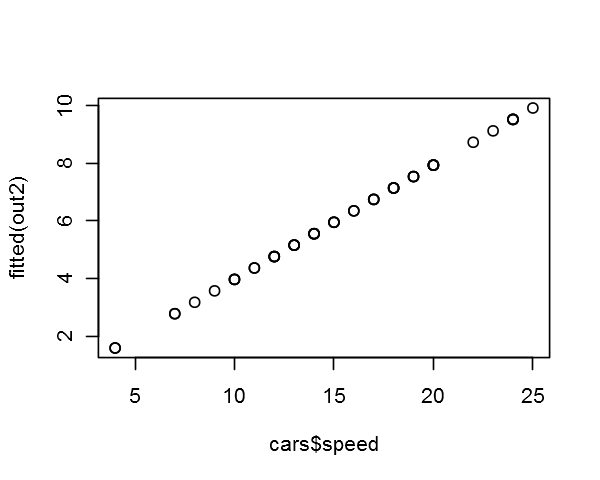

In [7]:
plot(cars$speed, fitted(out2))

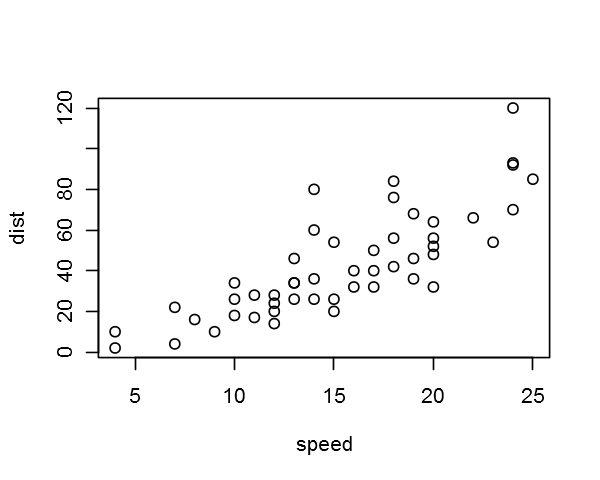

In [68]:
plot(dist~speed, cars)
# 50일떄의 값을 predict 할 수는 있겠지만, 조심해야 한다!

In [71]:
new2 <- data.frame("speed"=c(50))
predict(out2, new2)

1 
19.83747

## 아래 그래프 설명. 
 - 영향점 확인
 - 4번째 plot 모양에서 우측 상단에 0.5라고 써있는 빨간 선 확인 (Cook's distance)
 - 0.5 빨간 선 아래 모든 점이 있어서 influential point가 다행히 없다 
 - 넘어가는 점이 있으면, 초록색 선이 함께 뜬다 (influential point가 빠졌을 때의 회귀식)

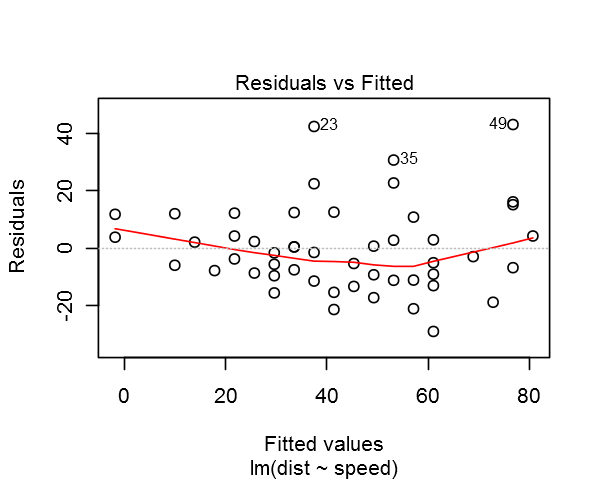

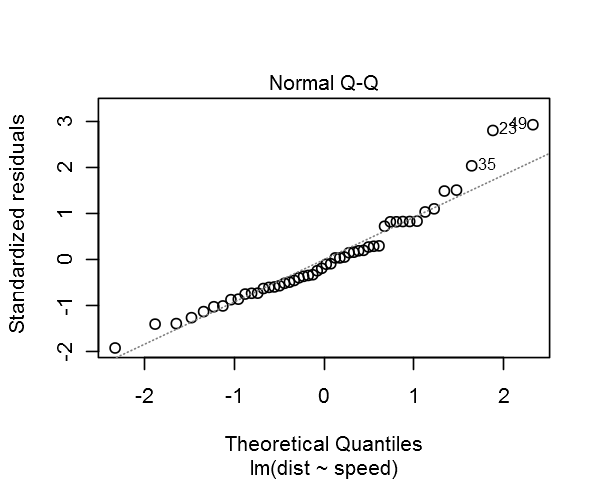

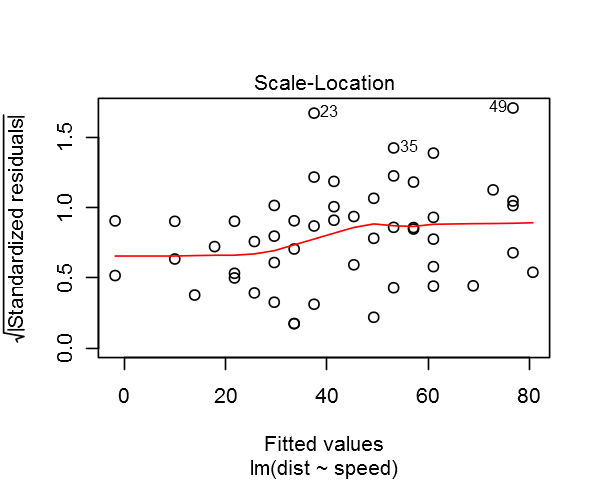

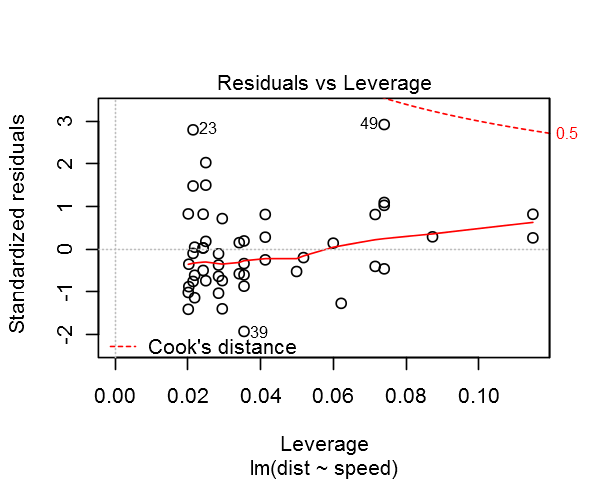

In [74]:
plot(out)

# 결과 해석의 유의점
<b>
<font size=4>
 - 회귀식은 가지고 있는 data 범위 밖에서 예측은 주의해야한다. ( Extrapolation 문제 ) <br> 어떤 그래프 등의 자료에서 나와있지 않은 부분을, 그 부분에 가까운 부분에서 이어나가서 추정하는 방법
 - 회귀식이 유의하다고 해서 인과관계를 증명하는 것은 아님. 
 </font></b>

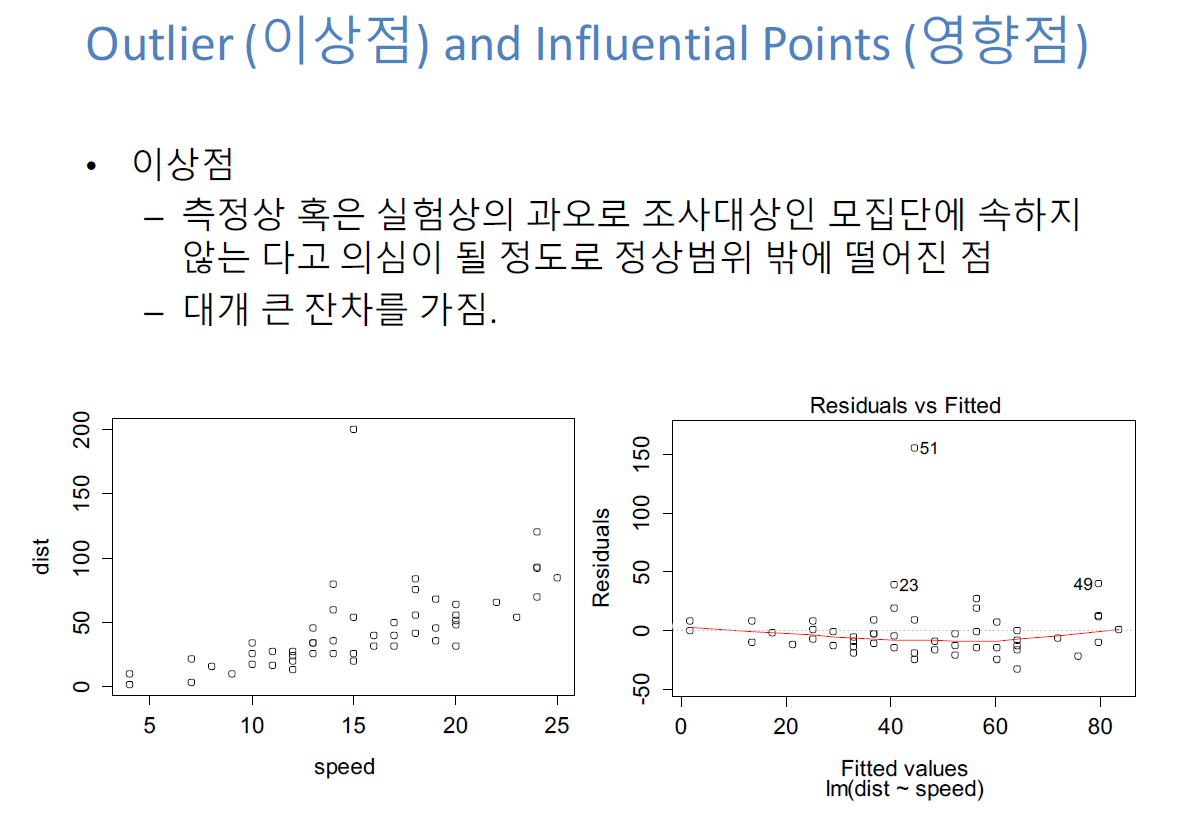

In [76]:
display_png(file="kmu/16.png", width = 700)

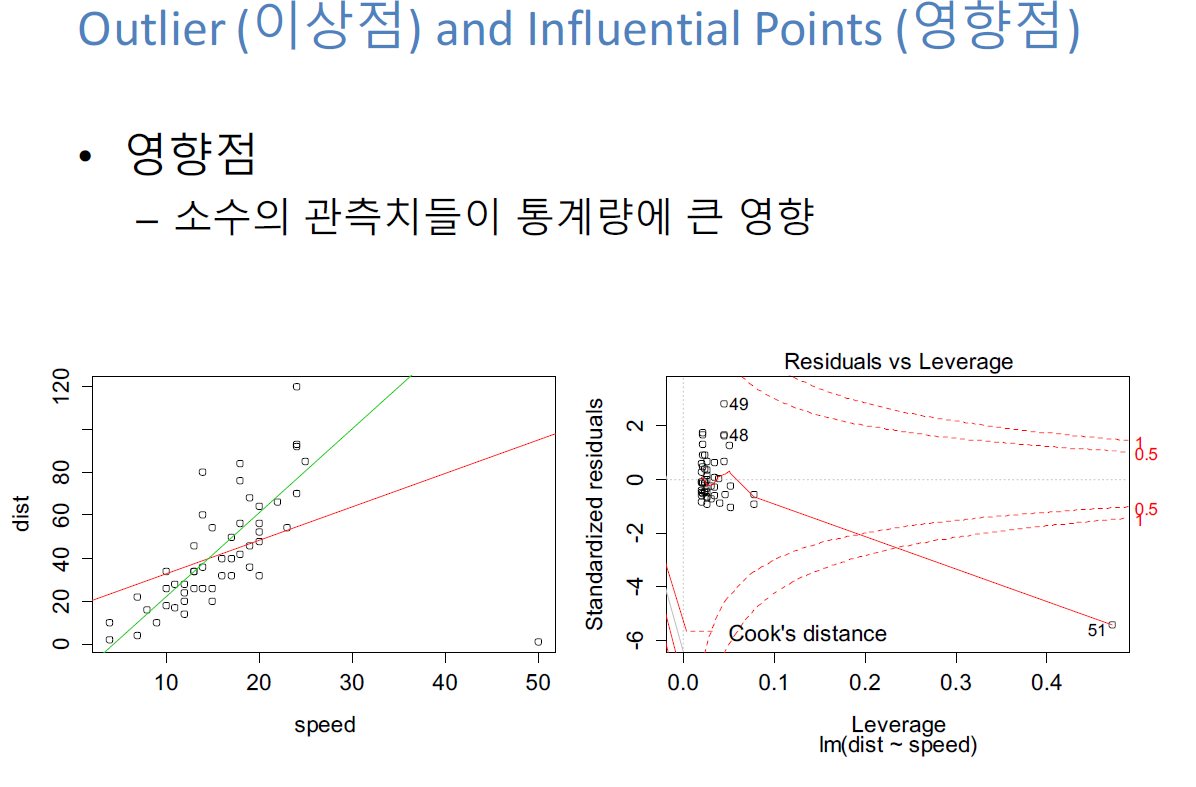

In [78]:
display_png(file="kmu/17.png", width = 700)

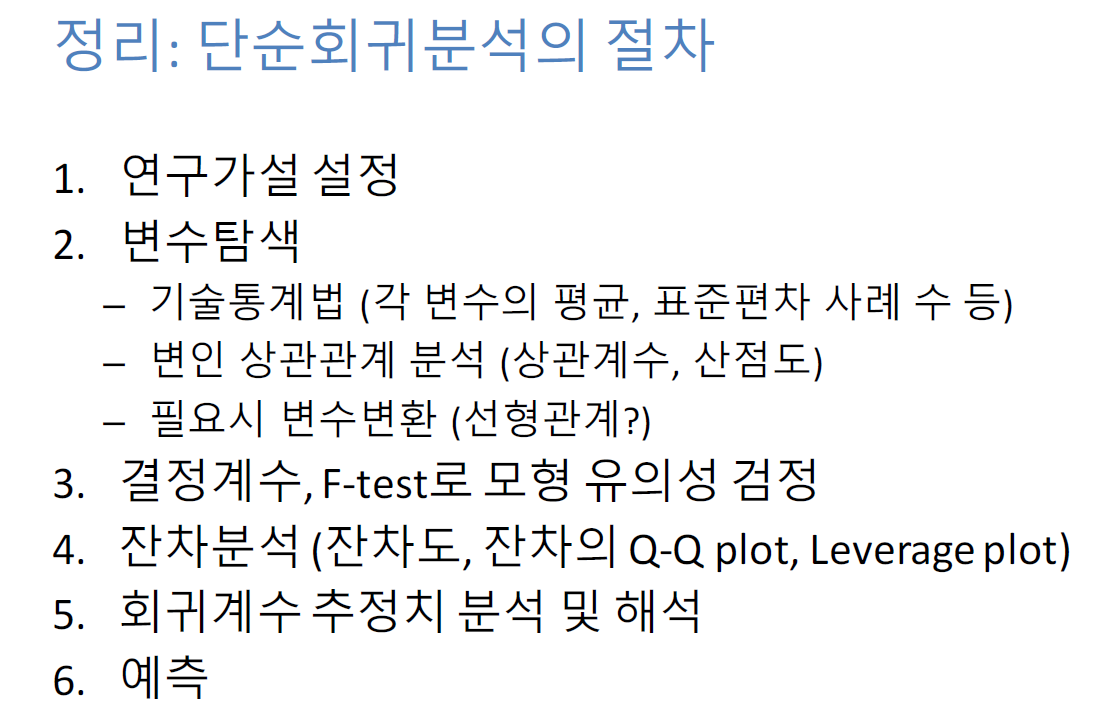

In [3]:
display_png(file="kmu/18.png", width = 700)

# 실습 예제

In [36]:
sonata <- read.csv("SLData/sonata.csv")
str(sonata)

'data.frame':	100 obs. of  3 variables:
 $ Price   : num  14.6 14.1 14 15.6 15.6 14.7 14.5 15.7 15.1 14.8 ...
 $ Odometer: num  37.4 44.8 45.8 30.9 31.7 34 45.9 19.1 40.1 40.2 ...
 $ Color   : int  1 1 3 3 2 2 1 3 1 1 ...


In [37]:
# 기술 통계량
summary(sonata)
sonata <- sonata[,-3] # <- color이라는 의미없는 변수를 삭제 

     Price          Odometer         Color     
 Min.   :13.60   Min.   :19.10   Min.   :1.00  
 1st Qu.:14.47   1st Qu.:32.17   1st Qu.:1.00  
 Median :14.70   Median :36.20   Median :2.00  
 Mean   :14.84   Mean   :36.01   Mean   :1.96  
 3rd Qu.:15.20   3rd Qu.:40.27   3rd Qu.:3.00  
 Max.   :16.40   Max.   :49.20   Max.   :3.00  

[1] -0.805168

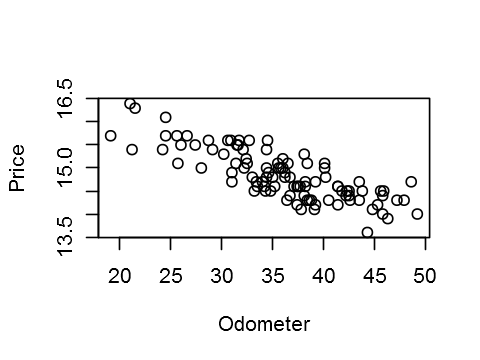

In [30]:
options(repr.plot.width=4, repr.plot.height=3)
plot(Price~Odometer, sonata)
cor(sonata$Price, sonata$Odometer)   #음의 상관계수, 높음 (-0.81)

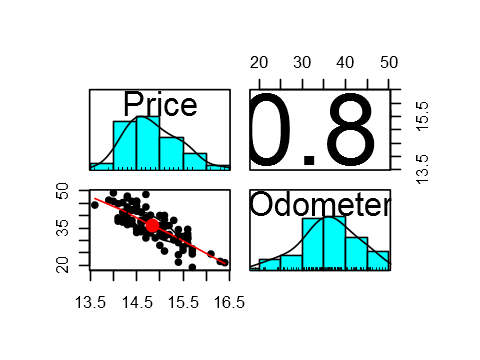

In [31]:
library(psych)
pairs.panels(sonata)

In [32]:
out4 <- lm(Price~Odometer, data=sonata)
out4


Call:
lm(formula = Price ~ Odometer, data = sonata)

Coefficients:
(Intercept)     Odometer  
   17.24873     -0.06686  


In [33]:
summary(out4)


Call:
lm(formula = Price ~ Odometer, data = sonata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68679 -0.27263  0.00521  0.23210  0.70071 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.248727   0.182093   94.72   <2e-16 ***
Odometer    -0.066861   0.004975  -13.44   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3265 on 98 degrees of freedom
Multiple R-squared:  0.6483,	Adjusted R-squared:  0.6447 
F-statistic: 180.6 on 1 and 98 DF,  p-value: < 2.2e-16


In [38]:
out4 <- lm(Price~0+Odometer, data=sonata)
summary(out4)
# y = 3.97x


Call:
lm(formula = Price ~ 0 + Odometer, data = sonata)

Residuals:
   Min     1Q Median     3Q    Max 
-5.519 -1.501  0.579  2.451  8.123 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
Odometer 0.396726   0.008538   46.47   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.125 on 99 degrees of freedom
Multiple R-squared:  0.9562,	Adjusted R-squared:  0.9557 
F-statistic:  2159 on 1 and 99 DF,  p-value: < 2.2e-16


##  설명 
 - F-test의 P-value가 매우 작다. 즉 회귀모형이 유의하다!
 - R-squared를 통해 0.96, 즉 96% 정도 설명력을 가진다 
 - t. test P-value가 매우 작다. 즉 유의하다. (= Odometer이 0에 가깝지만 알고보면 유의한 값) 

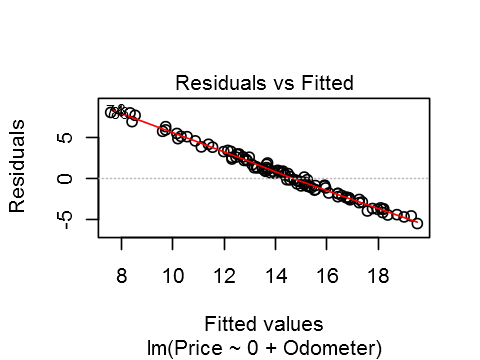

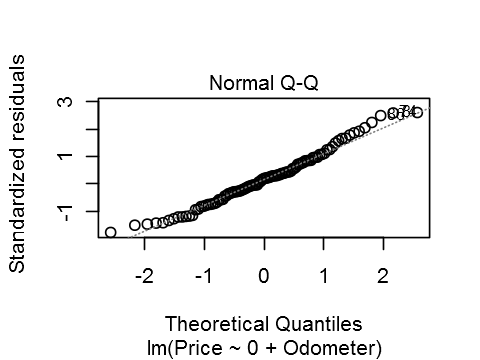

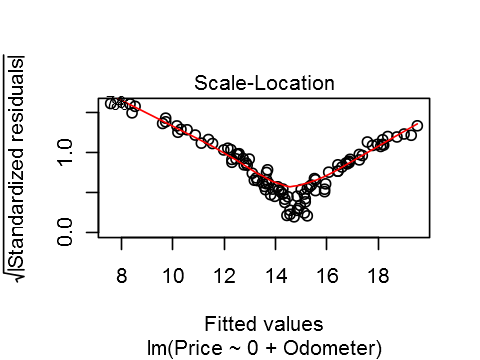

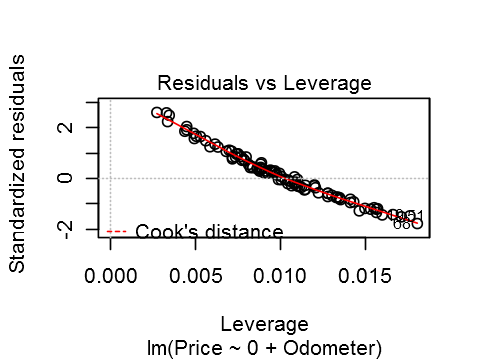

In [41]:
# 양호함 (residual plot, Q-Q plot, 영향값도 Cook's distance 밖에 없음) 
plot(out4)

In [44]:
# 주행거리의 계수 추정치
head(fitted(out4),5)

1        2        3        4        5 
14.83754 17.77331 18.17004 12.25883 12.57621

In [47]:
# Odometer = 3600마일, 평균가격을 95% 신뢰구간으로 추정
new3 <- data.frame("Odometer"=36)
predict(out4, new3, interval="confidence")

fit      lwr      upr
1 14.28213 13.67226 14.89199

In [48]:
predict(out4, data.frame("Odometer"=36), interval="confidence")
predict(out4, data.frame("Odometer"=36), interval="prediction")

fit      lwr      upr
1 14.28213 13.67226 14.89199

fit      lwr      upr
1 14.28213 8.051188 20.51307